https://www.kaggle.com/dansbecker/cityscapes-image-pairs

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from os import listdir
import re

from PIL import Image

In [4]:
# get all file names
path = 'train'
files = [f for f in listdir(path) if f[-4:]=='.jpg']
# load one to get the dimensions
image = mpimg.imread(f'{path}/{files[0]}')
# get dimensions
shape = list(image.shape)
# remove alpha if necessary
if (shape[2]==4):
    shape[2] = 3
n = len(files)

In [5]:
shape = (256,256,3)
y = np.zeros(shape=(n,*shape))
X = np.zeros(shape=(n,*shape))
for i in range(len(files)):
    # get the hour from the file name
    im = mpimg.imread(f'{path}/{files[i]}')[:,:,:shape[2]]
    X[i] = im[:,:256,:]
    y[i] = im[:,256:,:]
    
X = X/256
y = y/256

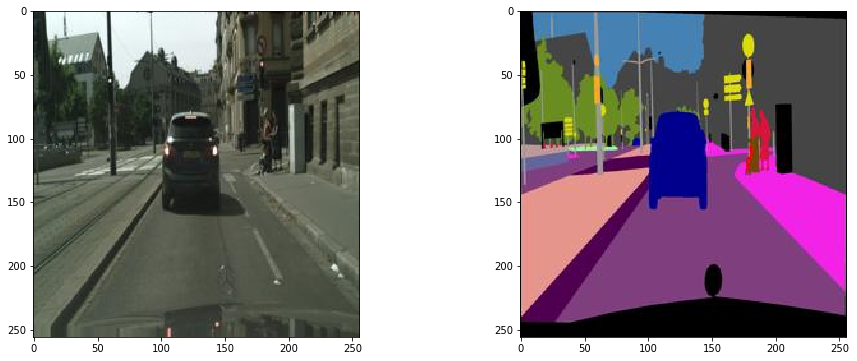

In [6]:
fig, ax = plt.subplots(ncols=2,figsize=(16,6))
i = np.random.randint(0,n)
ax[0].imshow(X[i])
ax[1].imshow(y[i])
plt.show()

In [8]:
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Conv2DTranspose, Dense, Reshape

Using TensorFlow backend.


In [17]:
n_conv = 5
f = 16

input_layer = Input(shape=(X.shape[1:]))
# for first iteration
pool = input_layer

# convolutions
for i in range(n_conv):
    conv = Convolution2D(f*2**i, kernel_size=3, padding='same',activation='relu')(pool)
    pool = MaxPooling2D()(conv)

up = pool
# upsampling
for i in range(n_conv-1):
    up = Conv2DTranspose(f*2**(n_conv-i-2), 3, strides=(2,2), padding='same',activation='relu')(up)

up = Conv2DTranspose(3, 3, strides=(2,2), padding='same',activation='sigmoid')(up)
#dense = Dense(6*6*64,activation='relu')(Flatten()(pool3))
#reshape = Reshape(target_shape=(6,6,64))(dense)


model = Model(inputs=input_layer, outputs=up)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 32, 32, 64)        0         
__________

In [18]:
model.fit(X,y,epochs=5)

Epoch 1/5
2975/2975 [==============================] - 295s 99ms/step - loss: 0.6596 - acc: 0.0740
Epoch 2/5
2975/2975 [==============================] - 293s 98ms/step - loss: 0.6219 - acc: 0.0757
Epoch 3/5
2975/2975 [==============================] - 300s 101ms/step - loss: 0.6027 - acc: 0.0750
Epoch 4/5
2975/2975 [==============================] - 301s 101ms/step - loss: 0.5940 - acc: 0.0750
Epoch 5/5
2975/2975 [==============================] - 304s 102ms/step - loss: 0.5890 - acc: 0.0750


In [20]:
model.evaluate(X,y)

2975/2975 [==============================] - 105s 35ms/step


[0.5863605243418397, 0.07518828697440003]

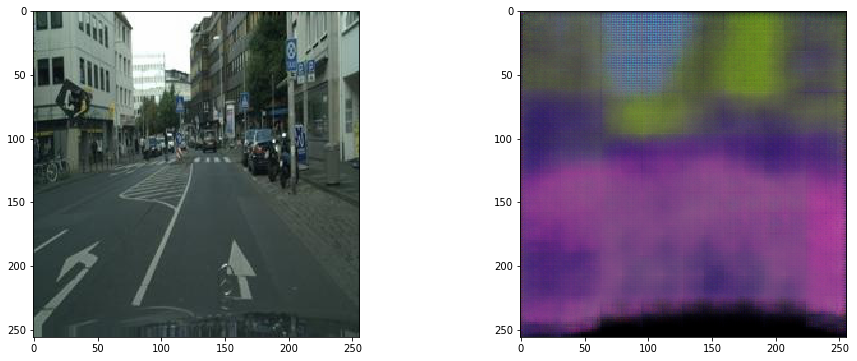

In [28]:
fig, ax = plt.subplots(ncols=2,figsize=(16,6))
i = np.random.randint(0,n)
ax[0].imshow(X[i])
pred = model.predict(X[i:i+1])
ax[1].imshow(pred[0])
plt.show()

In [35]:
path = 'val'
files = [f for f in listdir(path) if f[-4:]=='.jpg']
X_test = np.zeros(shape=(len(files),256,256,3))
for i in range(len(files)):
    # get the hour from the file name
    im = mpimg.imread(f'{path}/{files[i]}')
    X_test[i] = im[:,:256,:]
    
X_test = X_test/256

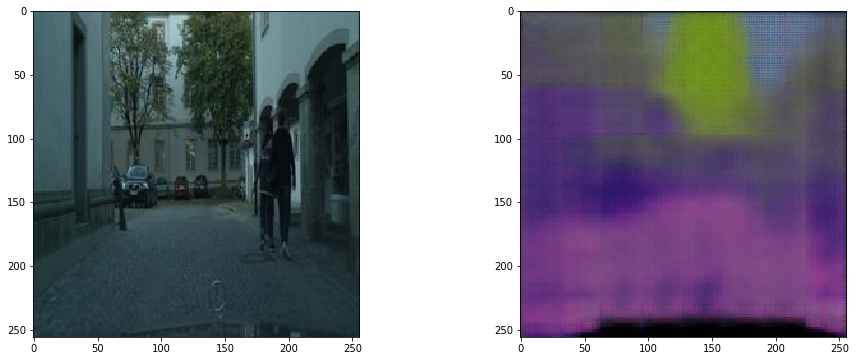

In [45]:
fig, ax = plt.subplots(ncols=2,figsize=(16,6))
i = np.random.randint(0,len(X_test))
ax[0].imshow(X_test[i])
pred = model.predict(X_test[i:i+1])
ax[1].imshow(pred[0])
plt.show()